In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, normaltest, chi2_contingency, f_oneway, pearsonr
import numpy as np
%matplotlib inline

In [3]:
# Load the datasets

# The 'movies' dataset is relevant for the recommendation system as it provides information about
# movie titles and genres, which are useful for content-based filtering and understanding movie characteristics.
movies = pd.read_csv('/content/drive/MyDrive/ml-20m/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# The 'tags' dataset adds valuable metadata to movies, allowing for enhanced recommendation personalization based on user tags and preferences.
tags = pd.read_csv('/content/drive/MyDrive/ml-20m/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
# The 'ratings' dataset is crucial as it contains user ratings for movies, which is key for collaborative filtering and
# understanding user preferences. The 'rating' variable could be used as a target for prediction in recommendation tasks.
ratings = pd.read_csv('/content/drive/MyDrive/ml-20m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
# The 'links' dataset is not directly related to user preferences or content filtering but can be useful
# for linking movies to external databases for further information.
links = pd.read_csv('/content/drive/MyDrive/ml-20m/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
# The 'genome-scores' dataset is important as it provides tag relevance scores, which can be used to better understand movie attributes and
# improve recommendation accuracy by incorporating tag-based similarity.
genome_scores = pd.read_csv('/content/drive/MyDrive/ml-20m/genome-scores.csv')
genome_scores.head()


,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [8]:
genome_tags = pd.read_csv('/content/drive/MyDrive/ml-20m/genome-tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [9]:
# Displaying basic information for each dataset
print("Movies Dataset: ")
print(movies.info())
print("\nTags Dataset: ")
print(tags.info())
print("\nRatings Dataset: ")
print(ratings.info())
print("\nLinks Dataset: ")
print(links.info())
print("\nGenome Scores Dataset: ")
print(genome_scores.info())
print("\nGenome Tags Dataset: ")
print(genome_tags.info())

Movies Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None

Tags Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB
None

Ratings Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   m

In [10]:
# Initial Analysis of Movies Data
print("\nFirst 5 Rows of Movies Dataset: ")
movies.head()


First 5 Rows of Movies Dataset: 


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Summary Statistics for Ratings
print("\nSummary Statistics for Ratings: ")
print(ratings['rating'].describe())


Summary Statistics for Ratings: 
count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Identifying Missing Values in Each Dataset
print("\nMissing Values in Movies Dataset: ")
print(movies.isnull().sum())
print("\nMissing Values in Tags Dataset: ")
print(tags.isnull().sum())
print("\nMissing Values in Ratings Dataset: ")
print(ratings.isnull().sum())
print("\nMissing Values in Links Dataset: ")
print(links.isnull().sum())
print("\nMissing Values in Genome Scores Dataset: ")
print(genome_scores.isnull().sum())
print("\nMissing Values in Genome Tags Dataset: ")
print(genome_tags.isnull().sum())


Missing Values in Movies Dataset: 
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Tags Dataset: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Missing Values in Ratings Dataset: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links Dataset: 
movieId      0
imdbId       0
tmdbId     252
dtype: int64

Missing Values in Genome Scores Dataset: 
movieId      0
tagId        0
relevance    0
dtype: int64

Missing Values in Genome Tags Dataset: 
tagId    0
tag      0
dtype: int64


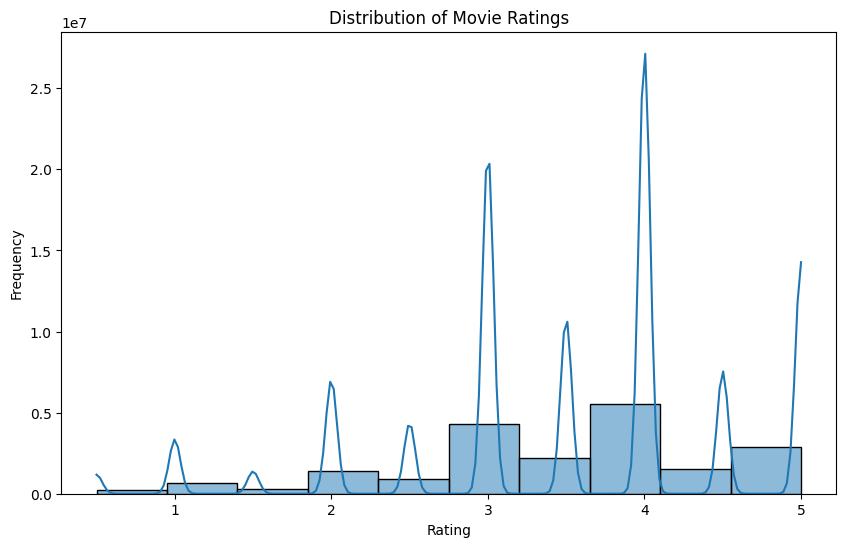

In [14]:
# Visualization 1: Distribution of Ratings
#Important for understanding user rating behavior and for normalizing or adjusting ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Validation of Distribution of Ratings
rating_skewness = skew(ratings['rating'])
print(f"Skewness of Ratings: {rating_skewness}")

stat, p = normaltest(ratings['rating'])
if p < 0.05:
    print("The distribution of ratings is not normal (p < 0.05).")
else:
    print("The distribution of ratings is normal (p >= 0.05).")

Skewness of Ratings: -0.6553111369463632
The distribution of ratings is not normal (p < 0.05).


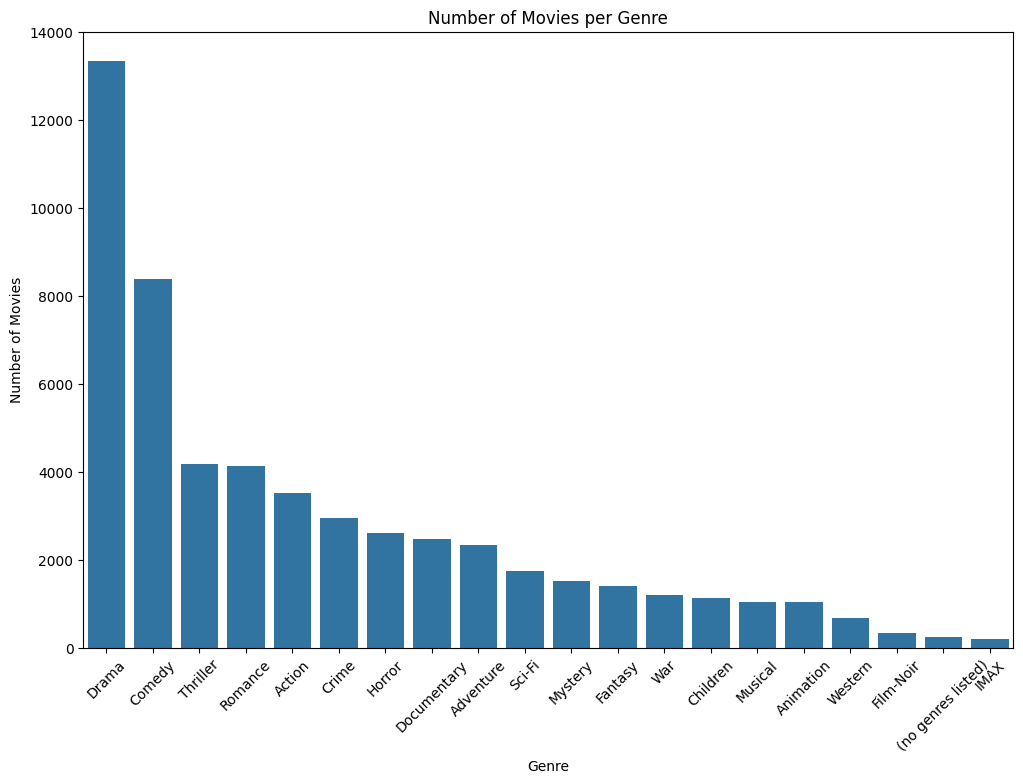

In [16]:
# Visualization 2: Number of Movies per Genre
# Essential for understanding genre distribution, identifying biases and gaps in movie representation.
movies['genres'] = movies['genres'].str.split('|')
genres_exploded = movies.explode('genres')
genre_counts = genres_exploded['genres'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Validation of Genre Representation
expected_count = len(genres_exploded) / len(genre_counts)
observed_vs_expected = pd.DataFrame({'Genre': genre_counts.index, 'Observed': genre_counts.values, 'Expected': [expected_count] * len(genre_counts)})
chi2, p, _, _ = chi2_contingency([observed_vs_expected['Observed'], observed_vs_expected['Expected']])
if p < 0.05:
    print("The genre distribution is significantly different from the expected uniform distribution (p < 0.05).")
else:
    print("The genre distribution is not significantly different from the expected uniform distribution (p >= 0.05).")

The genre distribution is significantly different from the expected uniform distribution (p < 0.05).


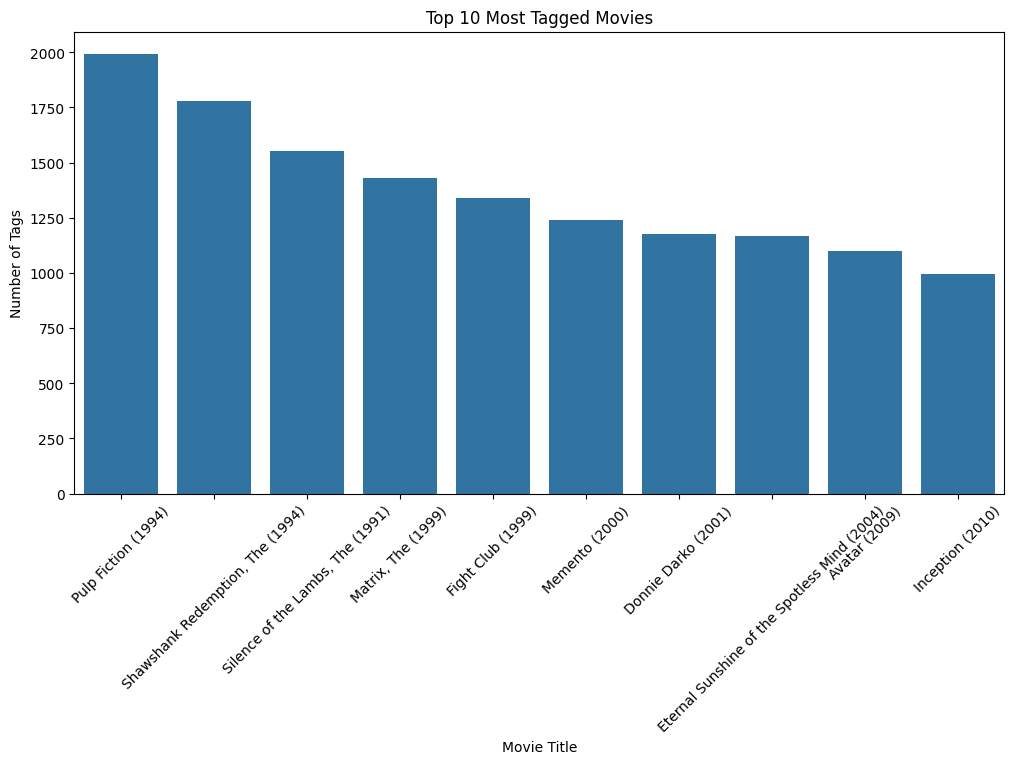

In [18]:
# Visualization 3: Top 10 Most Tagged Movies
# Identifying the most tagged movies helps in understanding user interaction and engagement, which can be used to identify popular movies and user preferences
top_tagged_movies = tags['movieId'].value_counts().head(10)
top_movies = movies[movies['movieId'].isin(top_tagged_movies.index)]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['title'], y=top_tagged_movies.values)
plt.title('Top 10 Most Tagged Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Tags')
plt.xticks(rotation=45)
plt.show()


Average Ratings for Top 10 Most Tagged Movies:
movieId
296      4.174231
2959     4.227123
79132    4.156172
2571     4.187186
318      4.446990
7361     4.105628
4878     4.015990
4226     4.178547
593      4.177057
72998    3.776582
Name: rating, dtype: float64


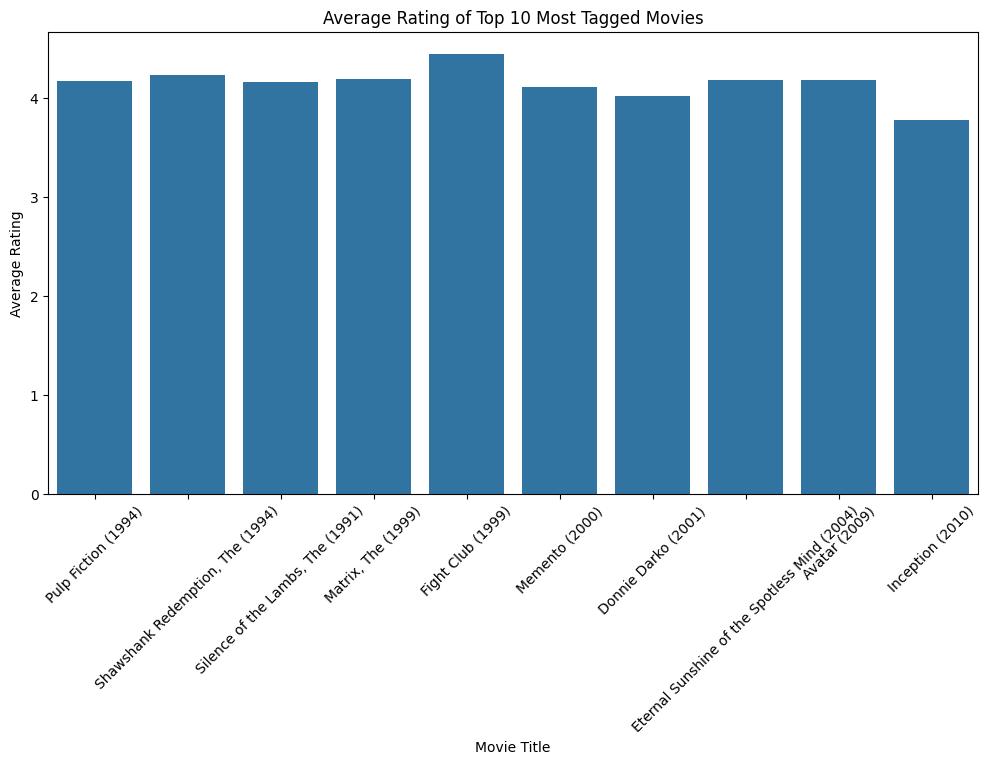

In [19]:
# Validation of Engagement Metrics
top_movie_ratings = ratings[ratings['movieId'].isin(top_tagged_movies.index)].groupby('movieId')['rating'].mean()
top_movie_ratings = top_movie_ratings.reindex(top_tagged_movies.index)
print("\nAverage Ratings for Top 10 Most Tagged Movies:")
print(top_movie_ratings)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['title'], y=top_movie_ratings.values)
plt.title('Average Rating of Top 10 Most Tagged Movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

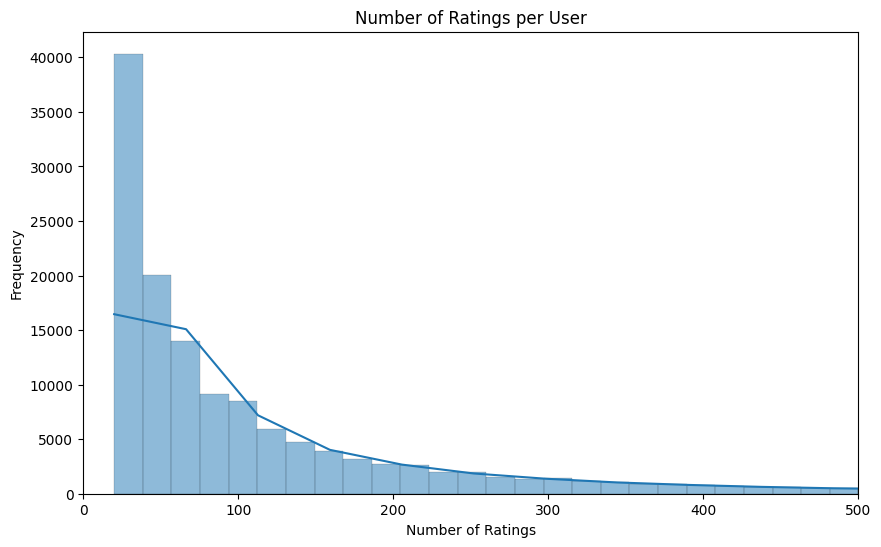

In [48]:
# Visualization 4: Number of Ratings per User
# The number of ratings per user is an important visualization to identify active users, which helps in
# understanding user engagement and ensuring adequate data for collaborative filtering
ratings_per_user = ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=500, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

Percentiles of User Engagement (Number of Ratings per User): [  35.     68.    155.    334.    520.   1113.08]


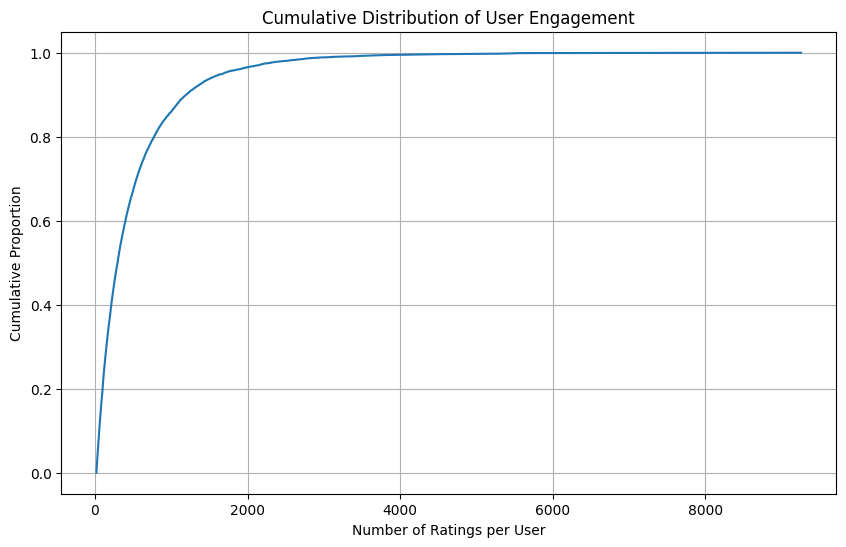

In [21]:
# Validation of User Engagement
percentiles = np.percentile(ratings_per_user, [25, 50, 75, 90, 95, 99])
print(f"Percentiles of User Engagement (Number of Ratings per User): {percentiles}")

plt.figure(figsize=(10, 6))
ratings_per_user_sorted = np.sort(ratings_per_user)
cumulative = np.cumsum(ratings_per_user_sorted) / ratings_per_user_sorted.sum()
plt.plot(ratings_per_user_sorted, cumulative)
plt.title('Cumulative Distribution of User Engagement')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()

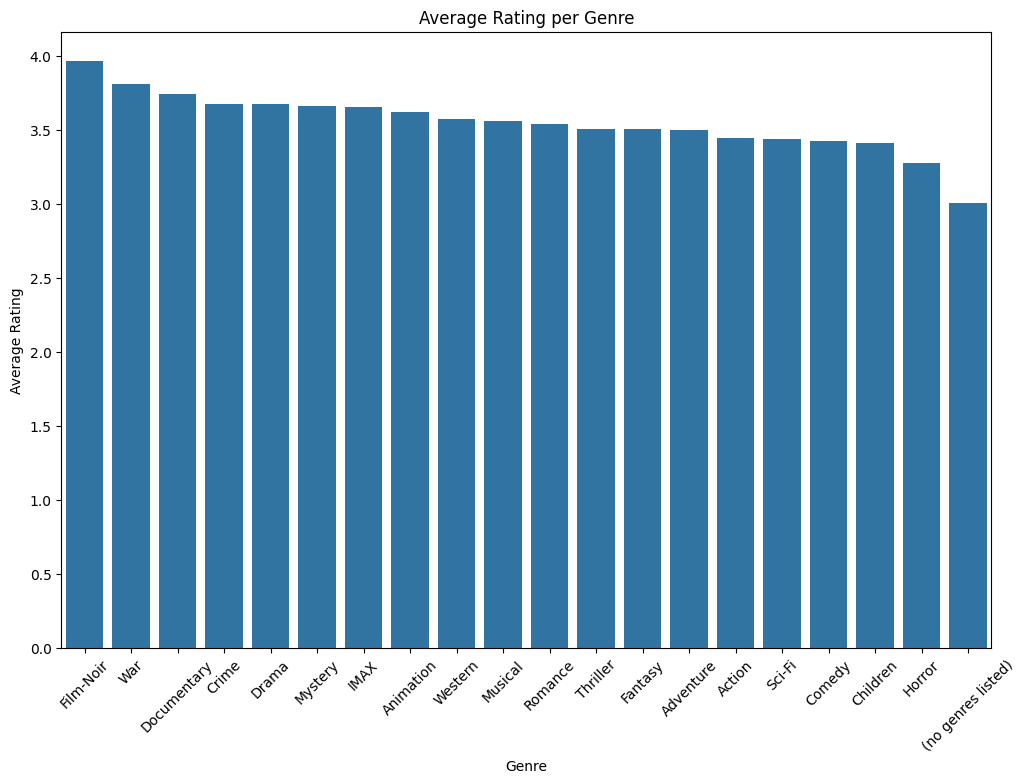

In [22]:
# Visualization 5: Average Rating per Genre
# Average rating per genre is useful to understand genre preferences among users, which helps in
# tailoring recommendations based on genre popularity
avg_rating_per_genre = genres_exploded.merge(ratings, on='movieId').groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_genre.index, y=avg_rating_per_genre.values)
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Validation of Average Rating Differences Between Genres
genre_ratings = genres_exploded.merge(ratings, on='movieId').groupby('genres')['rating'].apply(list)
stat, p = f_oneway(*genre_ratings)
if p < 0.05:
    print("There are statistically significant differences between the average ratings of different genres (p < 0.05).")
else:
    print("There are no statistically significant differences between the average ratings of different genres (p >= 0.05).")


There are statistically significant differences between the average ratings of different genres (p < 0.05).


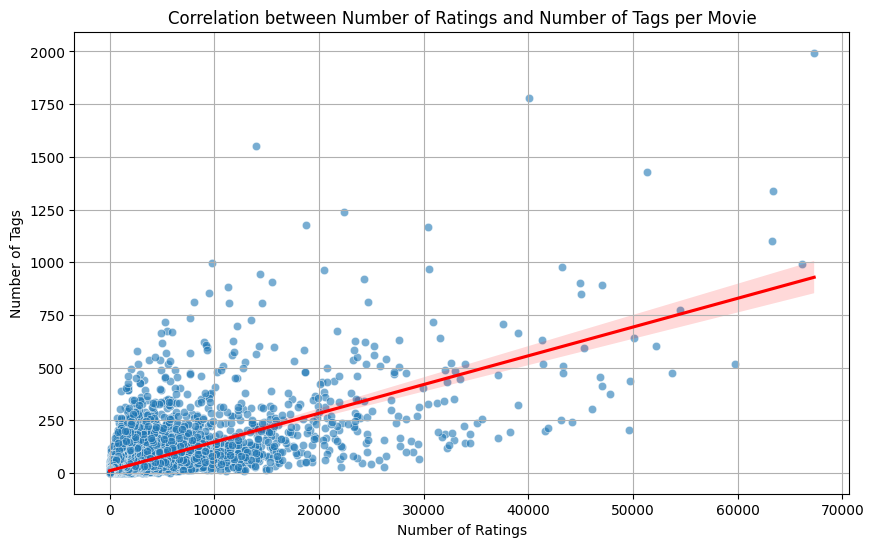

In [24]:
#Correlation between Number of Ratings and Number of Tags per Movie

# Step 1: Aggregate Number of Ratings per Movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count().reset_index()
ratings_per_movie.columns = ['movieId', 'num_ratings']

# Step 2: Aggregate Number of Tags per Movie
tags_per_movie = tags.groupby('movieId')['tag'].count().reset_index()
tags_per_movie.columns = ['movieId', 'num_tags']

# Step 3: Merge the Number of Ratings and Tags Data
ratings_tags_merged = pd.merge(ratings_per_movie, tags_per_movie, on='movieId', how='inner')

# Step 4: Visualize the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ratings_tags_merged, x='num_ratings', y='num_tags', alpha=0.6)
sns.regplot(data=ratings_tags_merged, x='num_ratings', y='num_tags', scatter=False, color='red')
plt.title('Correlation between Number of Ratings and Number of Tags per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Tags')
plt.grid(True)
plt.show()

In [25]:
# Step 5: Calculate Correlation
correlation, p_value = pearsonr(ratings_tags_merged['num_ratings'], ratings_tags_merged['num_tags'])
print(f"Correlation between Number of Ratings and Number of Tags: {correlation:.2f} (p-value: {p_value:.5f})")

Correlation between Number of Ratings and Number of Tags: 0.70 (p-value: 0.00000)


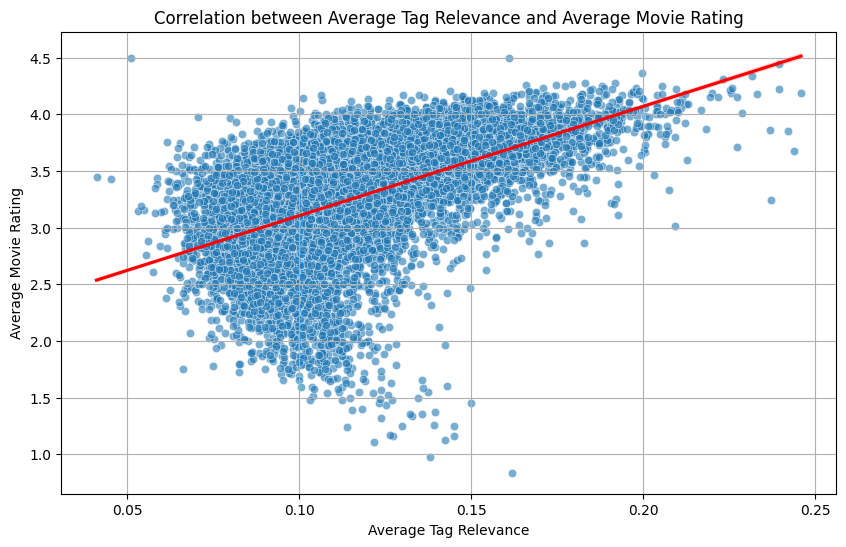

In [26]:
# Step 1: Calculate Average Tag Relevance per Movie
avg_tag_relevance = genome_scores.groupby('movieId')['relevance'].mean().reset_index()
avg_tag_relevance.columns = ['movieId', 'avg_tag_relevance']

# Step 2: Calculate Average Movie Rating
avg_movie_rating = ratings.groupby('movieId')['rating'].mean().reset_index()
avg_movie_rating.columns = ['movieId', 'avg_rating']

# Step 3: Merge Average Tag Relevance and Average Movie Rating
tag_rating_merged = pd.merge(avg_tag_relevance, avg_movie_rating, on='movieId', how='inner')

# Step 5: Visualize the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tag_rating_merged, x='avg_tag_relevance', y='avg_rating', alpha=0.6)
sns.regplot(data=tag_rating_merged, x='avg_tag_relevance', y='avg_rating', scatter=False, color='red')
plt.title('Correlation between Average Tag Relevance and Average Movie Rating')
plt.xlabel('Average Tag Relevance')
plt.ylabel('Average Movie Rating')
plt.grid(True)
plt.show()

In [27]:
# Step 4: Calculate Correlation
correlation, p_value = pearsonr(tag_rating_merged['avg_tag_relevance'], tag_rating_merged['avg_rating'])
print(f"Correlation between Average Tag Relevance and Average Movie Rating: {correlation:.2f} (p-value: {p_value:.5f})")


Correlation between Average Tag Relevance and Average Movie Rating: 0.54 (p-value: 0.00000)
